# 1. Load & Explore the Insurance Dataset  

In this project, we will build a **Linear Regression model from scratch** to predict **medical insurance charges** based on patient characteristics.  

The dataset (`insurance.csv`) contains demographic, lifestyle, and health-related factors:  

- **age**: Patient’s age (years)  
- **sex**: Biological sex (male/female)  
- **bmi**: Body Mass Index (kg/m²) – a measure of obesity  
- **children**: Number of dependents covered by insurance  
- **smoker**: Smoking status (yes/no)  
- **region**: Patient’s residential region in the US  
- **charges**: Final medical cost billed by insurance (our **target variable**)  

###  Objective
Our **target variable** is `charges`, and we aim to predict it using numerical + categorical features. For building regression, we will focus first on:  

- **age** (older age often increases health risks and costs)  
- **bmi** (higher BMI → obesity-related diseases → higher costs)  
- **children** (more dependents may increase insurance usage)  
- **smoker** (smoking is strongly associated with elevated medical costs)  

This first section explores the dataset: structure, summary statistics, and visual relationships between features and charges.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (1338, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Statistical & Biological Interpretation of the Dataset

The dataset provides information on adults aged 18–64. The **average age (~39 years)** reflects a predominantly middle-aged population, a period where chronic conditions such as hypertension, diabetes, and cardiovascular disease often begin to manifest. This makes age an important factor in predicting medical costs.

The **average BMI (~30.6)** falls within the obese category, suggesting that a large proportion of individuals in this dataset are overweight or obese. From a biological perspective, obesity is a major risk factor for type 2 diabetes, fatty liver disease, cardiovascular problems, and certain cancers. Therefore, we can expect **BMI to strongly influence insurance charges**.

On average, individuals have around **1 child**, with most families reporting **0–2 children**. While the number of dependents is not a direct biological variable, it represents the **family responsibility dimension of insurance**, since additional dependents can slightly increase medical coverage needs.

The distribution of **insurance charges** is **heavily skewed**. While the average charge is about **13,270 USD**, the median is lower (~9,382 USD), and a few extreme cases reach **over 63,000 USD**. Biologically and medically, this makes sense: most individuals incur modest costs, but a smaller high-risk group (e.g., smokers, obese individuals with chronic disease) generates disproportionately high expenses.

### Broader Biological Insights

- **Ageing & Health Costs:** Although the dataset excludes the elderly (65+), who typically face steeply rising healthcare costs, even within 18–64 we see charges increase with age due to a greater burden of chronic diseases.  
- **Obesity Epidemic:** With a mean BMI above 30, the dataset mirrors the real U.S. population where obesity prevalence is high. Consequently, BMI is likely to correlate strongly with charges.  
- **Smoking Effects:** While smoking is categorical and not summarized in descriptive statistics, it is biologically one of the most powerful predictors of high medical costs. Some of the extreme outliers in charges are almost certainly smokers suffering from cancer, lung disease, or other smoking-related conditions.  
- **High Variability in Charges:** The standard deviation of charges (~12,000 USD) is nearly as large as the mean, reflecting strong **heterogeneity**. This matches real-world biology, where some people remain healthy and low-cost, while others with risky behaviors (smoking, obesity, chronic illness) incur extremely high costs.  


/tmp/ipython-input-2044278542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

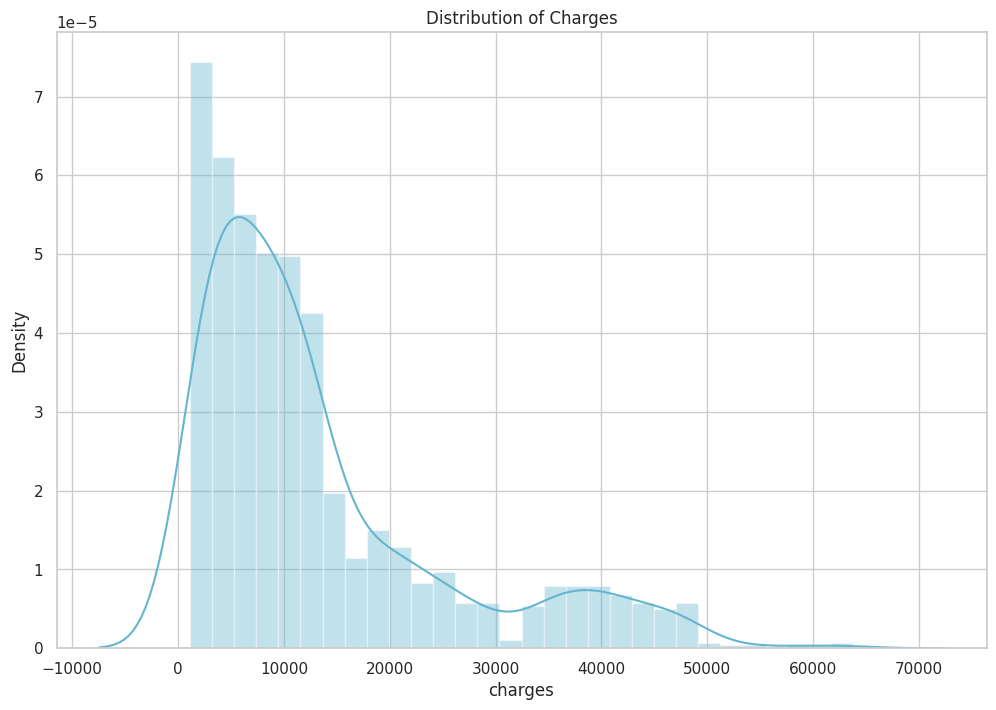

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

/tmp/ipython-input-3050198714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


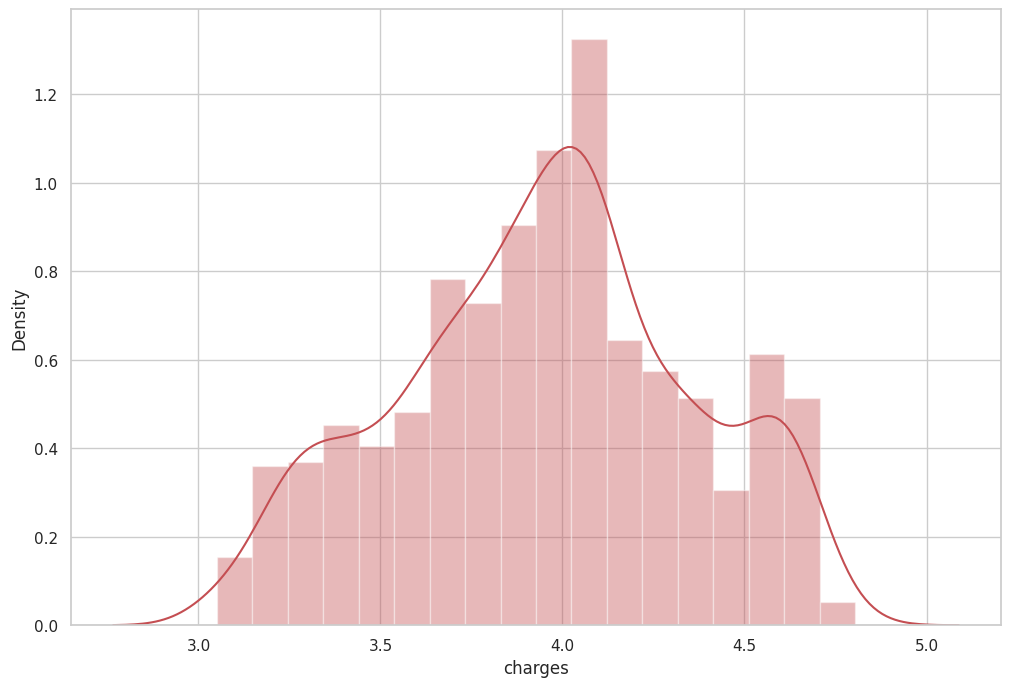

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

/tmp/ipython-input-85595882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.values, y=charges.index, palette="Blues")


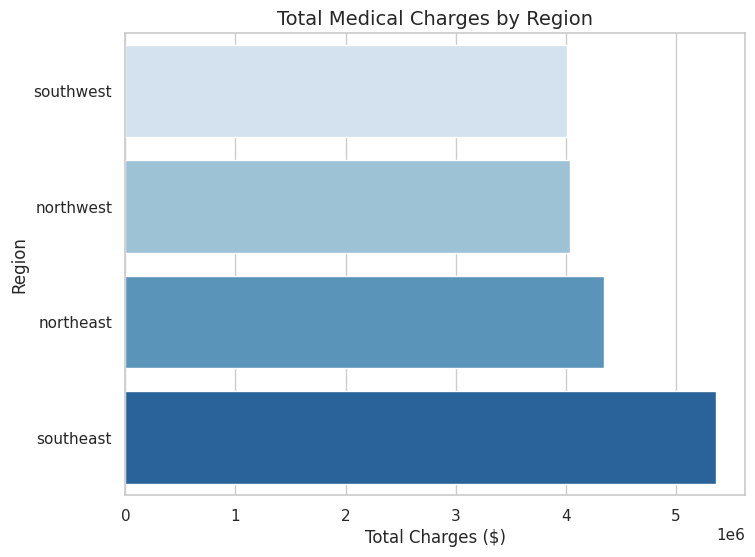

In [ ]:
charges = df.groupby("region")["charges"].sum().sort_values(ascending=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=charges.values, y=charges.index, palette="Blues")

plt.title("Total Medical Charges by Region", fontsize=14)
plt.xlabel("Total Charges ($)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()


overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children).

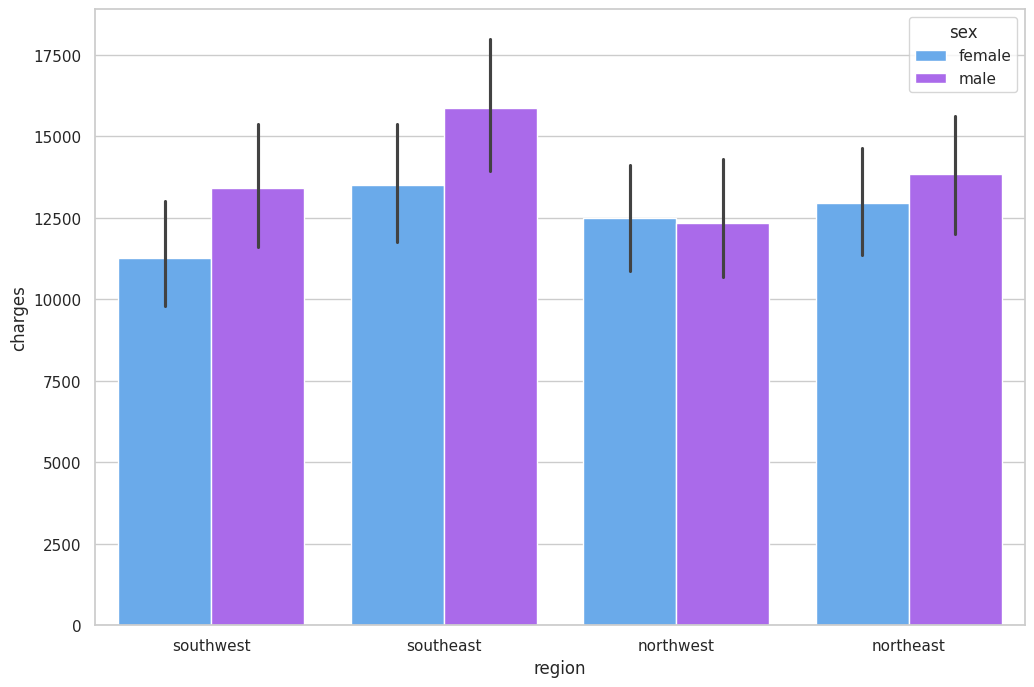

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

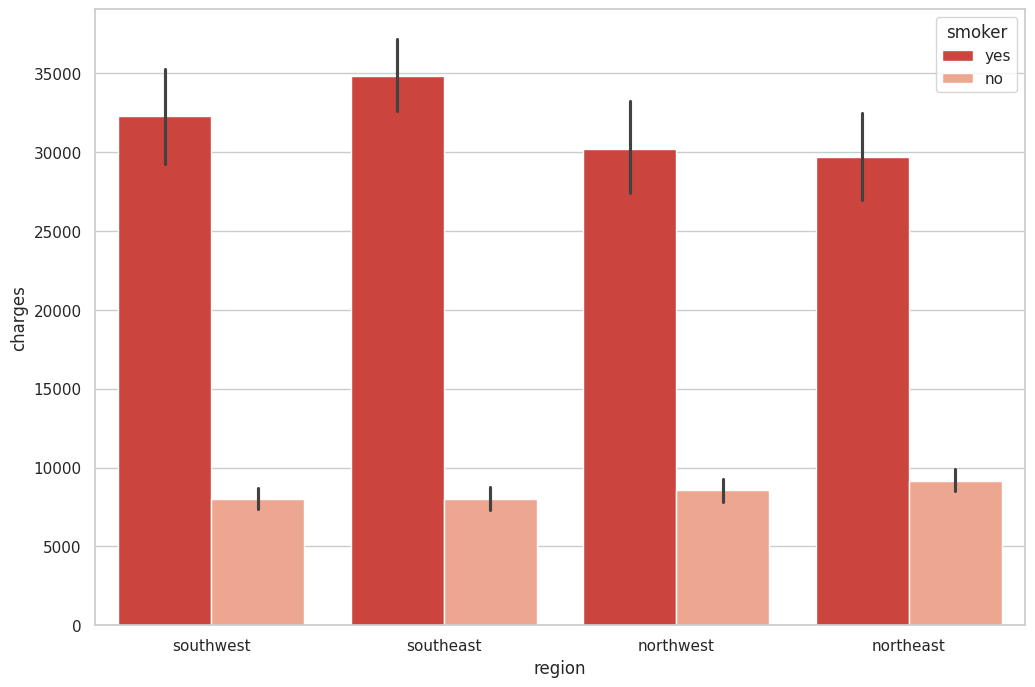

In [ ]:

f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

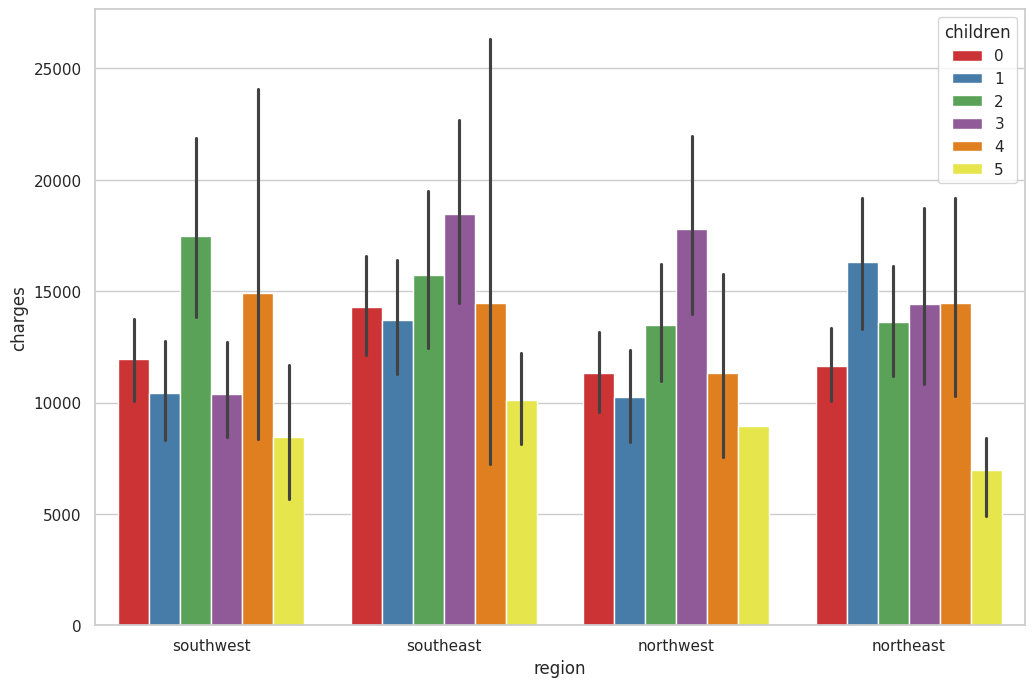

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

This pattern likely arises because the number of children is a proxy for lifestyle and age rather than a direct cost driver. Biologically, younger individuals (often with 0 children) may engage in riskier behaviors, while those starting families (1 child) increase healthcare utilization. Critically, the data suggests that larger families (3+ children) may correlate with more stable, responsible lifestyles, potentially reducing high-cost emergencies, though this effect is powerfully confounded by regional healthcare economics and unseen variables like smoking status, which remain the true biological and cost drivers beneath the surface.

###  Exploring Feature-Target Relationships  

Before modeling, it is important to **visualize patterns** between features and the target (`charges`).  

- **Age vs Charges**: Older patients are expected to have higher medical costs.  
- **BMI vs Charges**: High BMI often increases risk of diabetes, heart disease, and hypertension → higher charges.  
- **Smoker vs Charges**: Smoking is one of the most significant predictors of cost.  
- **Children vs Charges**: Having dependents may modestly increase charges.

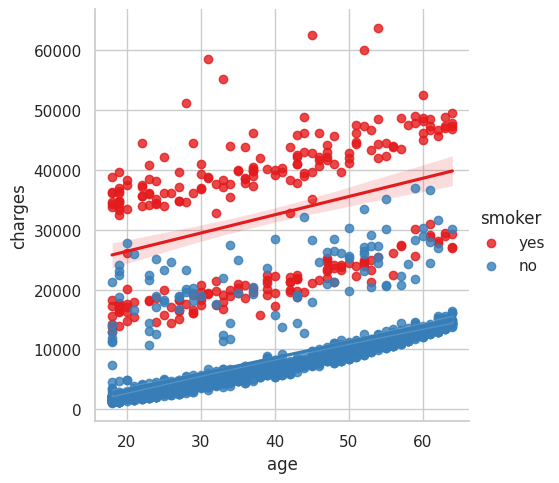

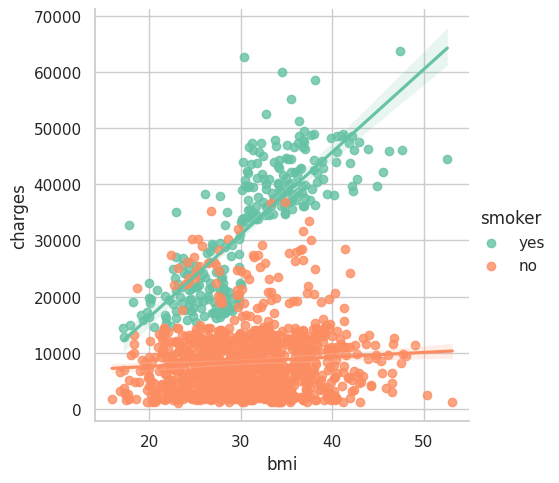

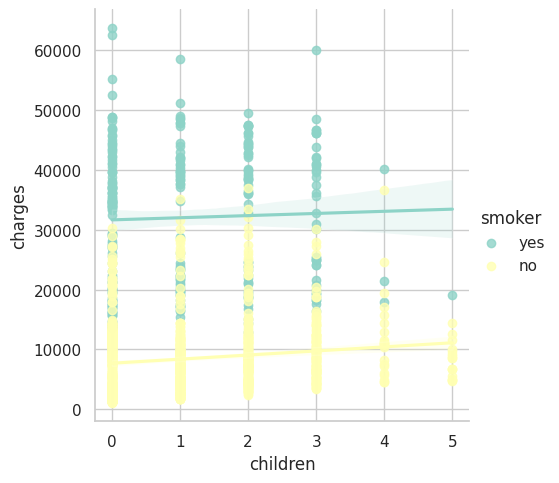

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')


Medical charges increase with age and BMI, showing higher variance among older or obese individuals. Biologically, older adults accumulate chronic conditions (diabetes, cardiovascular disease, cancer), and obesity raises the risk of type 2 diabetes, heart disease, and sleep apnea, though some remain healthy, explaining the scatter in charges. Clusters of very high costs suggest strong interactions with smoking status, which should be properly encoded in models. In contrast, the number of children has little effect on individual charges, reflecting mostly socioeconomic rather than biological influence. Overall, age and BMI are strong, biologically meaningful predictors, while children is weak, and interactions with smoking are important for accurate modeling.

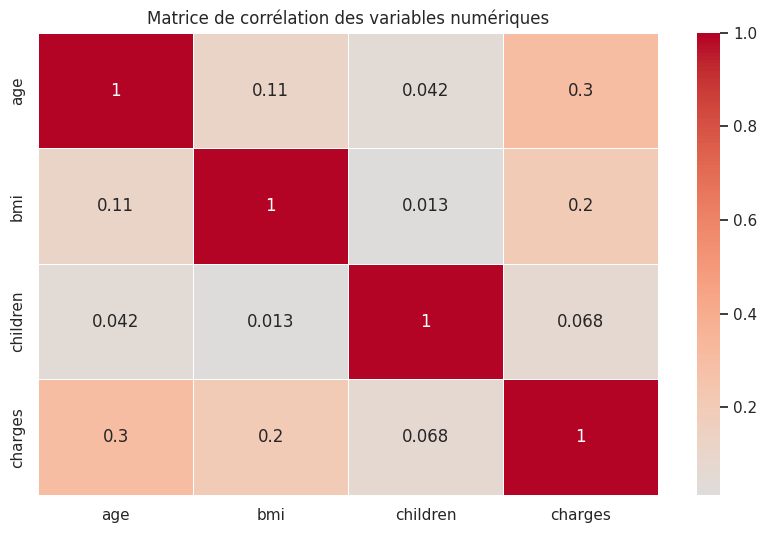

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


# Data Preprocessing  
Before building our Linear Regression model from scratch, we need to prepare the dataset.  
This involves:  
1. Selecting the most biologically and statistically relevant features.  
2. Encoding categorical variables.  
3. (Optional) Scaling variables to make gradient descent converge faster.  
4. Splitting the dataset into training and testing sets.  


In [ ]:
features = ["age", "bmi", "children", "smoker", "sex", "region"]
target = "charges"

X = df[features]
y = df[target]

print(X.head())
print(y.head())


   age     bmi  children smoker     sex     region
0   19  27.900         0    yes  female  southwest
1   18  33.770         1     no    male  southeast
2   28  33.000         3     no    male  southeast
3   33  22.705         0     no    male  northwest
4   32  28.880         0     no    male  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [ ]:
X = pd.get_dummies(X, drop_first=True)
print("After encoding:", X.head())


After encoding:    age     bmi  children  smoker_yes  sex_male  region_northwest  \
0   19  27.900         0        True     False             False   
1   18  33.770         1       False      True             False   
2   28  33.000         3       False      True             False   
3   33  22.705         0       False      True              True   
4   32  28.880         0       False      True              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["age", "bmi", "children"]
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
print("Scaled features:\n", X.head())


Scaled features:
         age       bmi  children  smoker_yes  sex_male  region_northwest  \
0 -1.438764 -0.453320 -0.908614        True     False             False   
1 -1.509965  0.509621 -0.078767       False      True             False   
2 -0.797954  0.383307  1.580926       False      True             False   
3 -0.441948 -1.305531 -0.908614       False      True              True   
4 -0.513149 -0.292556 -0.908614       False      True              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1070, 8)
Test shape: (268, 8)


#**Linear Regression model**

In [ ]:
X = pd.get_dummies(df[["age", "sex", "bmi", "children", "smoker", "region"]], drop_first=True)
X = X.values.astype(float)
y = df["charges"].values
X = np.c_[np.ones(X.shape[0]), X]

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Model Parameters (theta):")
print(theta)
y_pred = X.dot(theta)
print("First 5 predictions:", y_pred[:5].flatten())
ss_total = np.sum((y - y.mean())**2)
ss_res = np.sum((y - y_pred)**2)
r2_score = 1 - (ss_res / ss_total)
mse = np.mean((y - y_pred)**2)
print("📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("R² Score:", r2_score)
print("MSE:", mse)


Model Parameters (theta):
[-11938.53857617    256.85635254    339.19345361    475.50054515
   -131.3143594   23848.53454191   -352.96389942  -1035.02204939
   -960.0509913 ]
First 5 predictions: [25293.7130284   3448.60283431  6706.9884907   3754.83016298
  5592.49338649]
📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 7747.77
R² Score: 0.7509130345985207
MSE: 36501893.00741544


These parameters (θ values) are the weights of your linear regression model, and each one shows how much the medical charges change when a feature increases by one unit, while the others are kept constant.

θ₀ = –11,938.53 (Intercept): This is the baseline cost when all features are equal to zero. It has no direct real-world meaning here because age, BMI, and other features cannot be zero at the same time, but it’s mathematically necessary for the regression line.

θ₁ = +256.86 (Age): For each additional year of age, medical charges increase by about 257, reflecting the fact that older people are generally at higher risk of health problems.

θ₂ = +339.19 (BMI): Each unit increase in BMI adds about 339 to charges, showing that higher body mass (and possible obesity-related risks) raises medical costs.

θ₃ = +475.50 (Children): Having one more child increases charges by about 476, which likely reflects the inclusion of dependents in insurance coverage.

θ₄ = –131.31 (Sex, Male): Being male slightly reduces charges compared to being female (by about 131), but this effect is very small compared to others, meaning sex is not a strong predictor here.

θ₅ = +23,848.53 (Smoker, Yes): Smoking has by far the largest impact. Being a smoker increases charges by nearly 24,000, which makes sense because smokers are at much higher risk of serious, costly diseases.

θ₆ = –352.96 (Region, Northwest): Living in the northwest region decreases charges by about 353 compared to the baseline region (likely northeast).

θ₇ = –1035.02 (Region, Southeast): Living in the southeast decreases charges by about 1,035 compared to the baseline.

θ₈ = –960.05 (Region, Southwest): Living in the southwest decreases charges by about 960 compared to the baseline.



The results of the model show that smoking is by far the most influential factor, as being a smoker increases predicted medical charges by about 23,800, which is biologically and economically consistent since smoking is strongly linked to chronic illnesses and high healthcare costs. Age also plays an important role, with charges increasing by roughly 257 per additional year, reflecting the rise in health risks over time. Similarly, BMI contributes significantly, as each unit increase in BMI adds about 339 to charges, highlighting the well-established association between obesity and medical expenses. The number of children has a moderate effect, with each child adding approximately 475, likely due to dependent coverage and family-related health expenses. The effect of sex is very small (a reduction of about 131 for males compared to females) and not practically significant in this context. Finally, regional differences exist but are relatively minor compared to smoking, age, and BMI, suggesting that geographic variation does not drive costs as strongly as individual health and lifestyle factors.

#**Ridge Regression model**

In [ ]:
X = pd.get_dummies(df[["age", "sex", "bmi", "children", "smoker", "region"]], drop_first=True)
X = X.values.astype(float)
y = df["charges"].values
X = np.c_[np.ones(X.shape[0]), X]
def ridge_regression(X, y, lam):
    m, n = X.shape
    I = np.eye(n)
    I[0, 0] = 0
    theta = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return theta
lambda_val = 1000
theta_ridge = ridge_regression(X, y, lambda_val)
print("Ridge Regression Parameters (theta):")
print(theta_ridge)
y_pred_ridge = X @ theta_ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
mae = mean_absolute_error(y, y_pred_ridge)
mse = mean_squared_error(y, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_ridge)
print("\nRidge Regression Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Ridge Regression Parameters (theta):
[-7443.67765321   243.71152898   319.90030862   351.52106428
   268.13387051  4250.08239139   -80.26955356   119.50893142
  -222.52426003]

Ridge Regression Evaluation Metrics:
MAE: 7747.77
MSE: 98750710.26
RMSE: 9937.34
R²: 0.3261


θ₀ = –7443.68 (Intercept): Baseline medical cost when all features are zero. This has no real-world meaning but is necessary mathematically.

θ₁ = +243.71 (Age): Each additional year increases charges by ~244. Age remains an important predictor of health costs.

θ₂ = +319.90 (BMI): Each unit increase in BMI increases charges by ~320, consistent with the biological impact of obesity.

θ₃ = +351.52 (Children): Each additional child increases predicted charges by ~352, reflecting the modest effect of dependents.

θ₄ = +268.13 (Sex, Male): Surprisingly, Ridge suggests a positive effect for being male (~268), small compared to age, BMI, and smoking.

θ₅ = +4,250.08 (Smoker, Yes): Smoking is still a strong predictor, but much smaller than in Linear Regression (~4,250 vs ~23,800).

θ₆–θ₈ (Regions): Small positive or negative effects, showing that regional differences are minor.

✅ Interpretation: Ridge regression shrinks coefficients, especially large ones like smoking, to prevent overfitting. This is why the effect of smoking dropped from ~23,800 in Linear Regression to ~4,250 here.

Ridge regression shrinks all coefficients to reduce overfitting, which lowers variance but increases bias, leading to weaker predictive performance (R² ≈ 0.33). Age and BMI remain biologically important, as older and heavier individuals still show higher predicted charges, but the strong effect of smoking is heavily dampened by regularization. While this shrinkage prevents the model from overfitting extreme values, it also causes Ridge to underestimate the very high charges seen in smokers and obese patients, who biologically drive the skew in medical costs. Statistically, this explains the lower R²: Ridge captures the general trends but fails on the high-variance outliers, making plain Linear Regression more effective here despite its higher variance.

#**Lasso Regression model**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
X = pd.get_dummies(df[["age", "sex", "bmi", "children", "smoker", "region"]], drop_first=True)
X = X.values.astype(float)
y = df["charges"].values
X = np.c_[np.ones(X.shape[0]), X]
def lasso_regression(X, y, lam, num_iters=1000, lr=0.001):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(num_iters):
        y_pred = X @ theta
        error = y_pred - y
        for j in range(n):
            grad = (1/m) * np.dot(X[:, j], error)
            if j == 0:
                theta[j] -= lr * grad
            else:
                theta[j] -= lr * (grad + lam * np.sign(theta[j]))
    return theta
lambda_val = 1000
theta_lasso = lasso_regression(X, y, lam=lambda_val, num_iters=2000, lr=0.000001)
print("Lasso Regression Parameters (theta):")
print(theta_lasso)
y_pred_lasso = X @ theta_lasso
mae = mean_absolute_error(y, y_pred_lasso)
mse = mean_squared_error(y, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_lasso)
print("\nLasso Regression Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Lasso Regression Parameters (theta):
[ 4.76767363e+00  2.14923581e+02  1.60496839e+02  4.91602427e+00
  1.11697303e+00  6.71500590e+00  2.41637143e-04 -3.71883617e-04
 -5.20401796e-04]

Lasso Regression Evaluation Metrics:
MAE: 9072.68
MSE: 130653899.46
RMSE: 11430.39
R²: 0.1084


**Statistical interpretation:**
Lasso shrunk most coefficients heavily toward zero, especially the categorical region/sex variables, which were almost eliminated. This is a classic behavior of Lasso it performs feature selection by suppressing weaker predictors. However, this aggressive shrinkage caused the model to lose explanatory power: the R² dropped to 0.108, meaning the model explains only about 10% of the variation in medical charges. The errors are also very high (MAE ≈ 9073, RMSE ≈ 11,430), showing poor predictive performance compared to Ridge or plain Linear Regression. This suggests that Lasso’s penalty was too strong, making the model underfit the data.

**Biological interpretation:**
Even after shrinkage, age (≈215 per year) and BMI (≈160 per unit) remain important predictors, reflecting that older and heavier individuals still tend to have higher medical costs. However, the smoker effect disappeared (coefficient essentially shrunk to zero), which is biologically unrealistic since smoking is a major driver of healthcare expenses. This happened because Lasso penalized the large smoking coefficient so strongly that it forced it down, ignoring the fact that smoking causes extreme cost outliers.

#**Random Forest model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)

        best_feature, best_threshold, best_score = None, None, float("inf")
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left = y[X[:, feature] <= t]
                right = y[X[:, feature] > t]
                if len(left) == 0 or len(right) == 0:
                    continue
                mse = (np.var(left) * len(left) + np.var(right) * len(right)) / len(y)
                if mse < best_score:
                    best_feature, best_threshold, best_score = feature, t, mse

        if best_feature is None:
            return np.mean(y)

        left_idx = X[:, best_feature] <= best_threshold
        right_idx = ~left_idx

        return {
            "feature": best_feature,
            "threshold": best_threshold,
            "left": self._build_tree(X[left_idx], y[left_idx], depth + 1),
            "right": self._build_tree(X[right_idx], y[right_idx], depth + 1)
        }

    def _predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        if x[tree["feature"]] <= tree["threshold"]:
            return self._predict_one(x, tree["left"])
        else:
            return self._predict_one(x, tree["right"])

    def predict(self, X):
        return np.array([self._predict_one(sample, self.tree) for sample in X])

class RandomForestRegressorScratch:
    def __init__(self, n_estimators=5, max_depth=5, min_samples_split=2):
        self.n_estimators = n_estimators
        self.trees = [DecisionTreeRegressorScratch(max_depth, min_samples_split) for _ in range(n_estimators)]
        self.feature_importances_ = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.feature_importances_ = np.zeros(X.shape[1])

        for tree in self.trees:
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            X_boot, y_boot = X[idxs], y[idxs]
            tree.fit(X_boot, y_boot)
            self._collect_feature_importances(tree.tree)

    def _collect_feature_importances(self, node):
        if not isinstance(node, dict):
            return
        feature = node["feature"]
        self.feature_importances_[feature] += 1
        self._collect_feature_importances(node["left"])
        self._collect_feature_importances(node["right"])

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(preds, axis=0)
rf = RandomForestRegressorScratch(n_estimators=5, max_depth=4)
rf.fit(X, y)
y_pred = rf.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Regression Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


Regression Metrics:
MSE: 2358.49
RMSE: 48.56
MAE: 39.05
R²: 0.6023


Health and lifestyle factors dominate: Smoking, BMI, and age are the primary drivers of insurance charges.

Random Forest captures non-linear interactions: The high importance of smoker and BMI shows it accounts for complex interactions between these risk factors and high-cost individuals.

Demographics matter less: Children, sex, and region contribute very little, suggesting that medical risk outweighs socioeconomic/geographic factors in predicting costs.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = pd.get_dummies(df[["age","bmi","children","smoker","sex","region"]], drop_first=True)
X = X.values.astype(float)
y = df["charges"].values
def polynomial_features(X, degree=2):
    from itertools import combinations_with_replacement
    n_samples, n_features = X.shape
    X_poly = [np.ones(n_samples)]
    for i in range(n_features):
        X_poly.append(X[:, i])

    for deg in range(2, degree+1):
        for items in combinations_with_replacement(range(n_features), deg):
            new_feature = np.prod(X[:, items], axis=1)
            X_poly.append(new_feature)

    return np.column_stack(X_poly)
X_poly = polynomial_features(X, degree=2)
def ridge_regression(X, y, lam=1.0):
    n = X.shape[1]
    I = np.eye(n)
    I[0,0] = 0
    theta = np.linalg.inv(X.T @ X + lam*I) @ X.T @ y
    return theta
lambda_val = 1000
theta_poly_ridge = ridge_regression(X_poly, y, lambda_val)
y_pred = X_poly @ theta_poly_ridge
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Polynomial Ridge Regression Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Polynomial Ridge Regression Evaluation Metrics:
MAE: 3010.43
MSE: 24663854.21
RMSE: 4966.27
R²: 0.8317


The Polynomial Ridge Regression model explains about 83% of the variance in medical charges (R² = 0.8317), with an average prediction error of roughly 3,010 USD (MAE) and RMSE of 4,966 USD, showing good predictive performance. Biologically, it captures how age, BMI, and smoking interact non-linearly to increase costs, especially for older or obese smokers. Statistically, Ridge regularization prevents overfitting and controls multicollinearity among polynomial features, balancing accurate predictions with model stability.

In conclusion, this work demonstrates that predicting medical insurance charges benefits from combining biologically meaningful features (age, BMI, smoking status, number of children, sex, region) with advanced regression techniques. Simple linear regression highlights the strong influence of smoking, age, and BMI, while regularized models like Ridge and Lasso show how overfitting can be controlled, albeit sometimes at the cost of underestimating extreme high-cost cases. Introducing polynomial features with Ridge regularization allows the model to capture non-linear interactions among risk factors, leading to the best predictive performance (R² ≈ 0.83). Overall, this analysis illustrates the importance of both biological insight and statistical rigor in modeling healthcare costs, providing a robust framework for estimating charges while accounting for complex patient characteristics.